In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import pandas as pd
import numpy as np
import scipy.stats as sts

In [2]:
# Files to load
city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load = 'Resources/ride_data.csv'

In [3]:
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Merge DataFrames to a single dataset.
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left', on=['city','city'])

pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [6]:
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [7]:
total_rides = pyber_data_df.groupby(['type']).count()['ride_id']
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [8]:
total_drivers = city_data_df.groupby(['type']).sum()['driver_count']


total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [9]:
total_fares = pyber_data_df.groupby(['type']).sum()['fare']
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [10]:
avg_fare_per_ride = pyber_data_df.groupby(['type']).sum()['fare']/pyber_data_df.groupby(['type']).count()['ride_id']
avg_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [11]:
avg_fare_per_driver = pyber_data_df.groupby(['type']).sum()['fare']/city_data_df.groupby(['type']).sum()['driver_count']
avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [12]:
per_city_type_summary_df = pd.DataFrame({
    'Total Rides': total_rides,
    'Total Drivers': total_drivers,
    'Total Fares': total_fares,
    'Average Fare per Ride': avg_fare_per_ride,
    'Average Fare per Driver': avg_fare_per_driver
})
per_city_type_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [13]:
#Formating data
per_city_type_summary_df['Total Rides'] = per_city_type_summary_df['Total Rides'].map('{:,.2f}'.format)
per_city_type_summary_df['Total Drivers'] = per_city_type_summary_df['Total Drivers'].map('{:,.2f}'.format)

per_city_type_summary_df['Total Fares'] = per_city_type_summary_df['Total Fares'].map('${:,.2f}'.format)
per_city_type_summary_df['Average Fare per Ride'] = per_city_type_summary_df['Average Fare per Ride'].map('${:,.2f}'.format)
per_city_type_summary_df['Average Fare per Driver'] = per_city_type_summary_df['Average Fare per Driver'].map('${:,.2f}'.format)

per_city_type_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125.00,78.00,"$4,327.93",$34.62,$55.49
Suburban,625.00,490.00,"$19,356.33",$30.97,$39.50
Urban,"1,625.00","2,405.00","$39,854.38",$24.53,$16.57


In [14]:
per_city_type_summary_df.index.name = None
per_city_type_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125.00,78.00,"$4,327.93",$34.62,$55.49
Suburban,625.00,490.00,"$19,356.33",$30.97,$39.50
Urban,"1,625.00","2,405.00","$39,854.38",$24.53,$16.57


In [15]:
pyber2_df=pyber_data_df.rename(columns={'city':'City', 'date':'Date','fare':'Fare','ride_id':'Ride ID','driver_count':'No. of Drivers','type':'City Type'})
pyber2_df

,City,Date,Fare,Ride ID,No. of Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [16]:
pyber_copy_df = pyber2_df.copy()
pyber_copy_df

,City,Date,Fare,Ride ID,No. of Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [17]:
pyber_copy_df=pyber_copy_df.drop(['City','Ride ID','No. of Drivers'], axis=1)
pyber_copy_df

,Date,Fare,City Type
0,2019-01-14 10:14:22,13.83,Urban
1,2019-03-04 18:24:09,30.24,Urban
2,2019-02-24 04:29:00,33.44,Urban
3,2019-02-10 23:22:03,23.44,Urban
4,2019-03-06 04:28:35,34.58,Urban
...,...,...,...
2370,2019-04-29 17:04:39,13.38,Rural
2371,2019-01-30 00:05:47,20.76,Rural
2372,2019-02-10 21:03:50,11.11,Rural
2373,2019-05-07 19:22:15,44.94,Rural


In [18]:
pyber_copy_df['Date'] = pd.to_datetime(pyber_copy_df['Date'])

In [19]:
pyber_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2375 non-null   datetime64[ns]
 1   Fare       2375 non-null   float64       
 2   City Type  2375 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 74.2+ KB


In [20]:
pyber_copy_df = pyber_copy_df.set_index('Date')
pyber_copy_df

,Fare,City Type
Date,,
2019-01-14 10:14:22,13.83,Urban
2019-03-04 18:24:09,30.24,Urban
2019-02-24 04:29:00,33.44,Urban
2019-02-10 23:22:03,23.44,Urban
2019-03-06 04:28:35,34.58,Urban
...,...,...
2019-04-29 17:04:39,13.38,Rural
2019-01-30 00:05:47,20.76,Rural
2019-02-10 21:03:50,11.11,Rural


In [21]:
pyber_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Fare       2375 non-null   float64
 1   City Type  2375 non-null   object 
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [22]:
#sum up fares for Groupby City type AND date.

fare_sum_city_date = pyber_copy_df.groupby(['City Type','Date']).sum()['Fare']
fare_sum_city_date = fare_sum_city_date.reset_index()
fare_sum_city_date

,City Type,Date,Fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [23]:
pivot_df = fare_sum_city_date.pivot_table(index=['Date'], columns='City Type', aggfunc='sum')
pivot_df

Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-05-08 04:20:00   NaN      NaN  21.99
2019-05-08 04:39:49   NaN      NaN  18.45
2019-05-08 07:29:01   NaN      NaN  18.55
2019-05-08 11:38:35   NaN      NaN  19.77
2019-05-08 13:10:18   NaN      NaN  18.04

[2375 rows x 3 columns]

In [24]:
fare_date_loc_df = pivot_df.loc['2019-01-01':'2019-04-28']
fare_date_loc_df

Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-04-28 14:28:36   NaN      NaN  11.46
2019-04-28 16:29:16   NaN      NaN  36.42
2019-04-28 17:26:52   NaN      NaN  31.43
2019-04-28 17:38:09   NaN    34.87    NaN
2019-04-28 19:35:03   NaN    16.96    NaN

[2196 rows x 3 columns]

In [25]:
fare_weekly_df = fare_date_loc_df.resample('W').sum()
fare_weekly_df

Fare                  
City Type    Rural Suburban    Urban
Date                                
2019-01-06  187.92   721.60  1661.68
2019-01-13   67.65  1105.13  2050.43
2019-01-20  306.00  1218.20  1939.02
2019-01-27  179.69  1203.28  2129.51
2019-02-03  333.08  1042.79  2086.94
2019-02-10  115.80   974.34  2162.64
2019-02-17   95.82  1045.50  2235.07
2019-02-24  419.06  1412.74  2466.29
2019-03-03  175.14   858.46  2218.20
2019-03-10  303.94   925.27  2470.93
2019-03-17  163.39   906.20  2044.42
2019-03-24  189.76  1122.20  2368.37
2019-03-31  199.42  1045.06  1942.77
2019-04-07  501.24  1010.73  2356.70
2019-04-14  269.79   784.82  2390.72
2019-04-21  214.14  1149.27  2303.80
2019-04-28  191.85  1357.75  2238.29

In [26]:
#Need to Convert date to months for x-axis
locator = mdate.MonthLocator()
fmt = mdate.DateFormatter('%b')

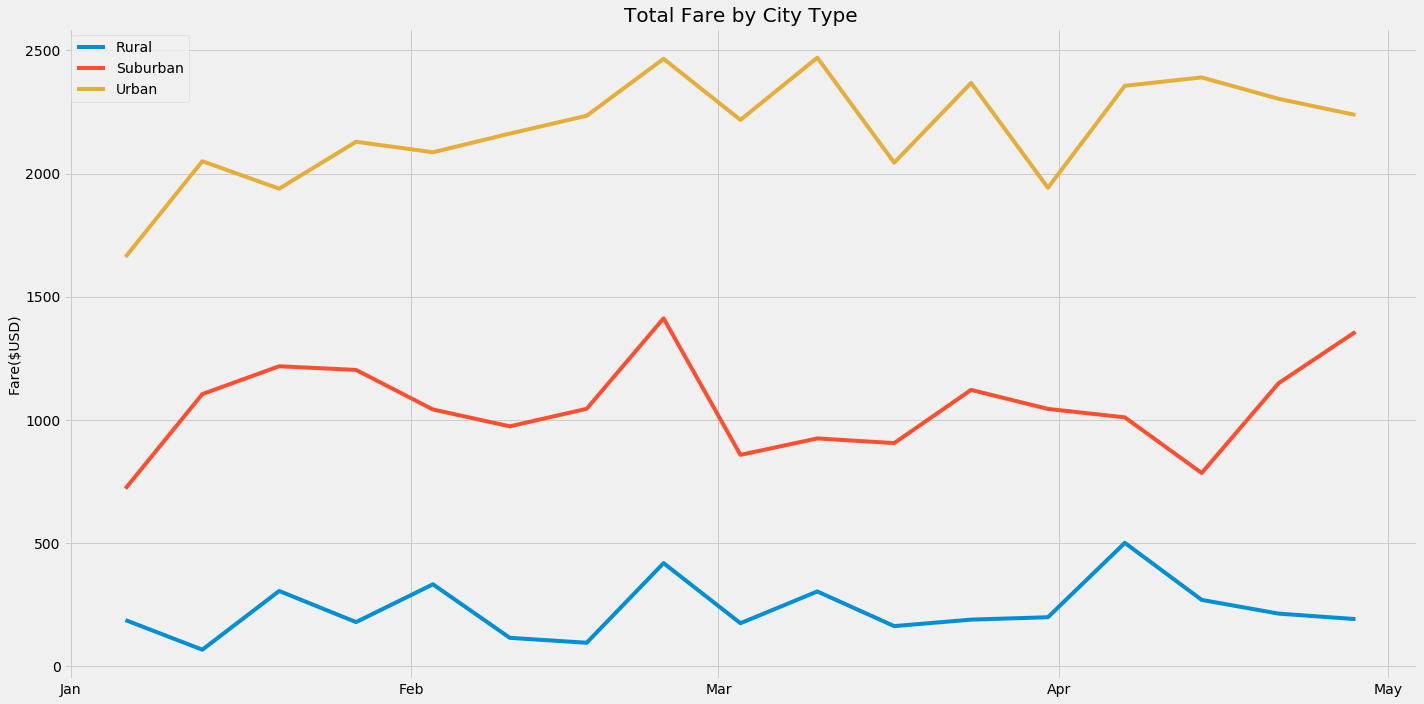

<Figure size 432x288 with 0 Axes>

In [27]:
x_label= ['Rural','Suburban','Urban']
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(fare_weekly_df)
ax.set_title('Total Fare by City Type',fontsize=20)
ax.set_ylabel('Fare($USD)',fontsize=14)
ax.set_yticks(np.arange(0, 3000, step=500))
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(fmt)
ax.legend(x_label)
plt.tight_layout()
plt.show()
plt.savefig('analysis/Fig8.png')